In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

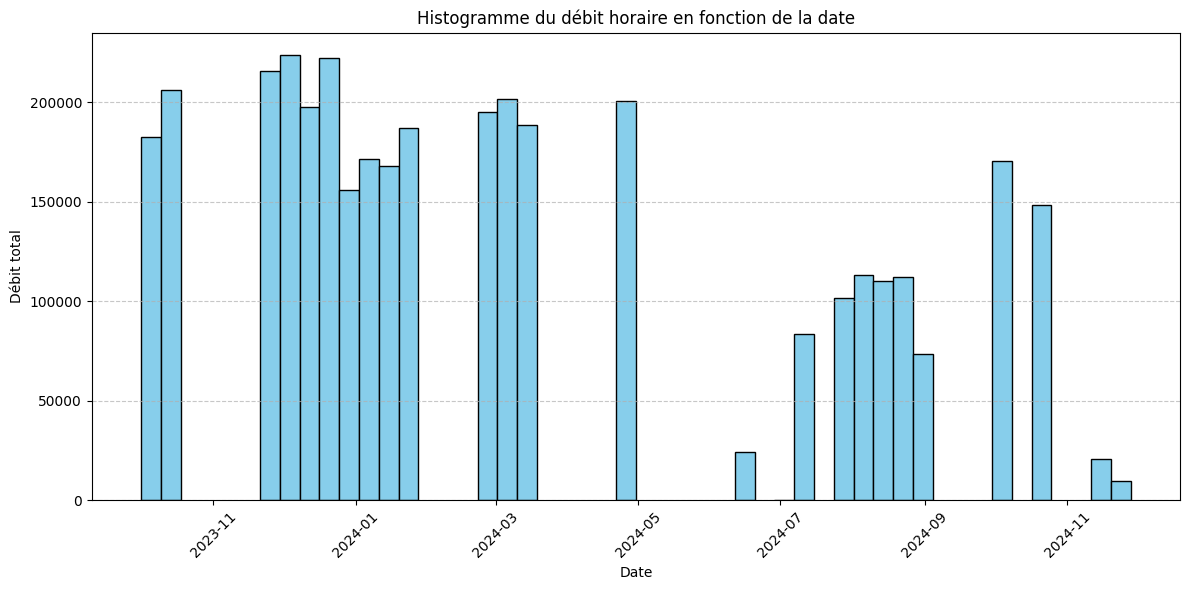

In [ ]:
#Dataset Champs Elysées
raw_df = pd.read_csv(r'comptages-routiers-permanents.csv', delimiter=';')

# Convertir la colonne en datetime et définir l'index
raw_df['Date et heure de comptage'] = pd.to_datetime(raw_df['Date et heure de comptage'], errors='coerce', utc=True)
raw_df.set_index('Date et heure de comptage', inplace=True)
raw_df.sort_index(inplace=True)

# Tracer un histogramme du débit horaire en fonction de la date
plt.figure(figsize=(12, 6))
plt.hist(raw_df.index, bins=50, weights=raw_df['Débit horaire'], color='skyblue', edgecolor='black')  # Remplacez "Débit horaire" par le nom exact
plt.title('Histogramme du débit horaire en fonction de la date')
plt.xlabel('Date')
plt.ylabel('Débit total')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

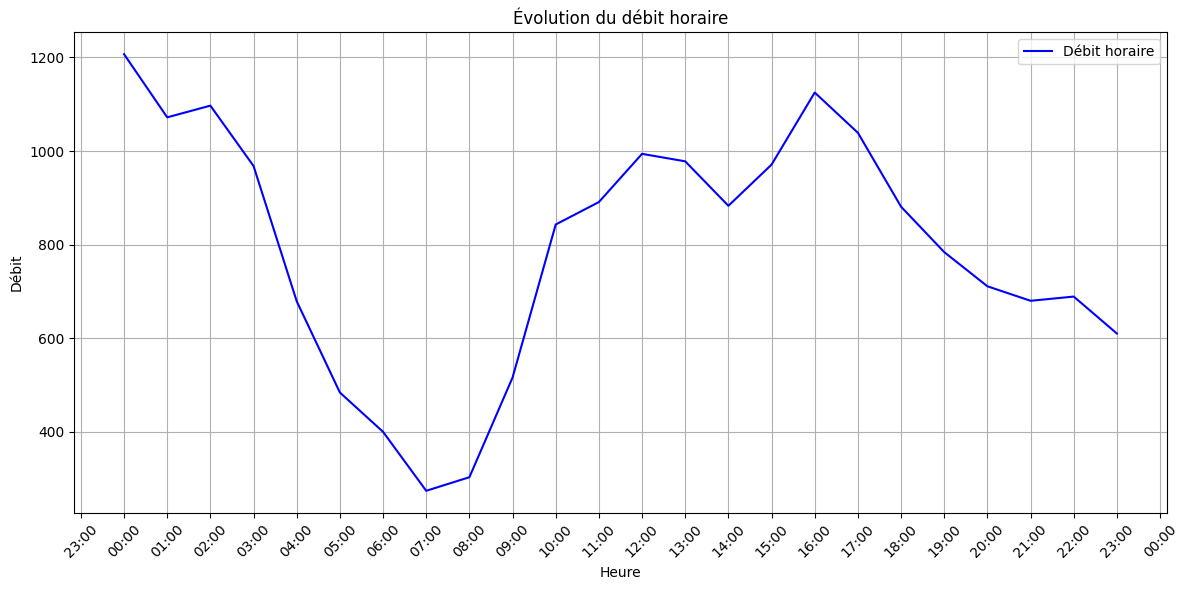

In [ ]:
#Selectionner une portion du df pour une période donnée
sept_debit_df = raw_df.loc['2024-01-14 00:00:00+00:00':'2024-01-14 23:00:00+00:00']

# Tracer les données
plt.figure(figsize=(12, 6))
plt.plot(sept_debit_df.index, sept_debit_df['Débit horaire'], label='Débit horaire', color='blue')  # Remplacez "Débit horaire" par le nom exact de la colonne

# Configurer l'affichage des ticks pour ne montrer que l'heure
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format heure:minute
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Tick toutes les heures

# Incliner les étiquettes pour qu'elles soient lisibles
plt.xticks(rotation=45, fontsize=10)

# Ajouter les détails du graphique
plt.title('Évolution du débit horaire')
plt.xlabel('Heure')
plt.ylabel('Débit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
